#Exercícios de Física Computacional
##Folha 9
1. Use o método de Gauss-Seidel com sobre-relaxação para resolver a equação de Laplace para o problema bi-dimensional representado na figura
seguinte:


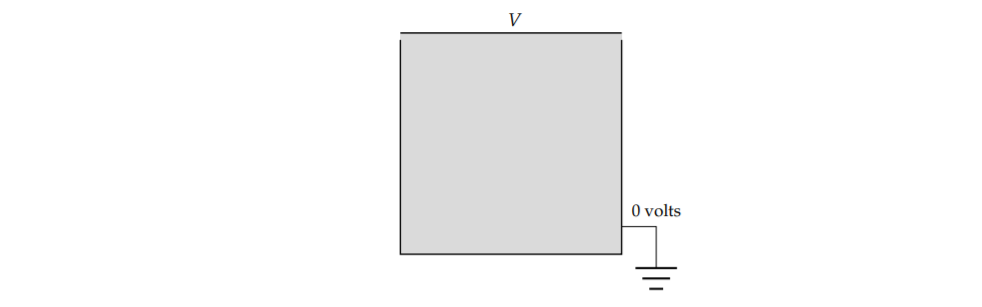

Considere que o quadrado tem um lado 1 m e que V = 1 V. Use uma
grelha com espaçamento de 1 cm, continuando a iteração até que o valor
do potencial elétrico não varie mais do que 10−6 V em qualquer ponto
da grelha e represente os resultados obtidos num gráfico de densidade.
Experimente diversos valores de ω, avaliando o efeito na velocidade de
execução do programa.

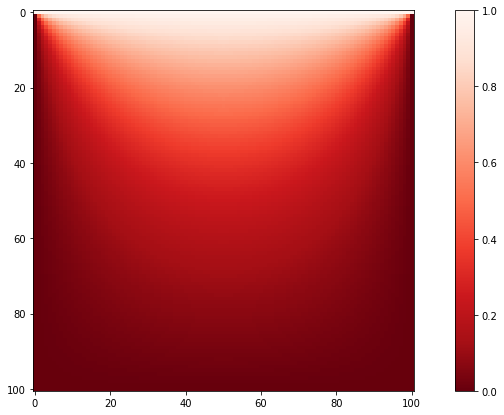

In [ ]:
from numpy import empty,zeros,max
from pylab import imshow,show,colorbar,set_cmap,figure

#Constantes
M=100 #Quadrados de cada lado
V=1.0 #Voltagem parede de cima
target=1e-6 #accuracy

#Array para os potenciais valores
phi=zeros([M+1,M+1],float)
phi[0,:]=V
phiprime=empty([M+1,M+1],float)

#Main loop
delta=1.0
while delta>target:
  for i in range(M+1):  #Calcular novos valores de potencial
    for j in range(M+1):
      if i==0 or i==M or j==0 or j==M:
        phiprime[i,j]=phi[i,j]
      else:
        phiprime[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4
  delta=max(abs(phi-phiprime)) #Calcular diferença máxima para valores antigos
  phi,phiprime=phiprime,phi #Trocar os dois arrays

#Fazer o plot
figure(figsize=[15,7])
imshow(phi)
colorbar()
set_cmap("Reds_r")
show()

2. Discuta como generalizar a resolução da equação de Laplace a 3 dimensões usando o método das diferenças finitas.

In [ ]:
# phiprime[i,j,k]=phiprime[i,j]=(phi[i+1,j,k]+phi[i-1,j,k]+phi[i,j+1,k]+phi[i,j-1,k]+phi[i,j,k+1]+phi[i,j,k-1])/6

3. Considere o sistema a duas dimensões, representado na figura seguinte:


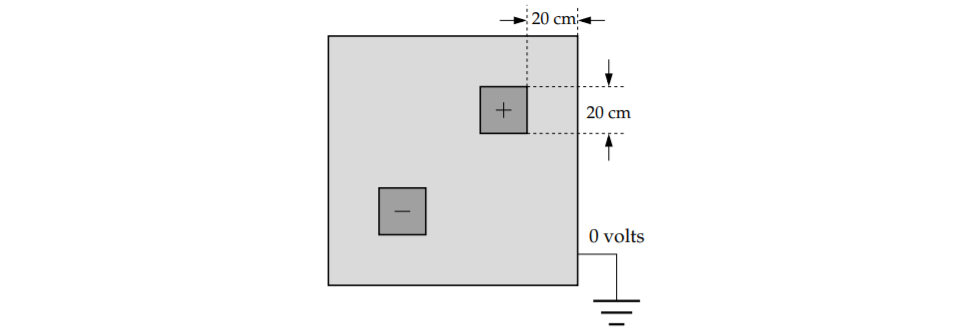

Cada lado do quadrado, de comprimento 1 m, está ligado à terra estando,
portanto, a 0 V. Duas cargas quadradas são colocadas como representado
na figura, tendo cada uma delas uma densidade de carga correspondente
a ρ = ±1 Cm2
. Resolva a equação de Poisson para este sistema:

∇^2φ = −
ρ/
ε0
.

Resolva numericamente a equação de Poisson para este sistema num
sistema de unidades em que ε0 = 1. Como critério de convergência use
uma variação do potencial elétrico por iteração inferior a 10^−6 V.


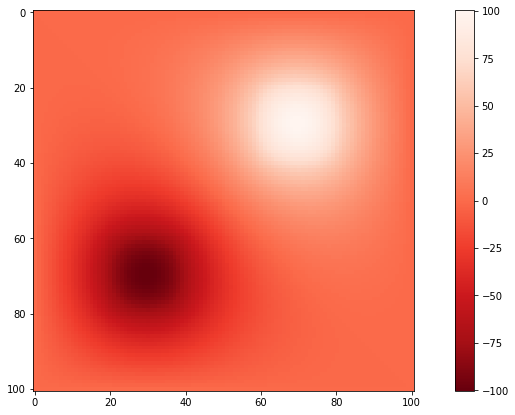

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pylab import imshow,show,colorbar,set_cmap,figure

M=100 #divisões da grelha 1cm cada quadrado
target=1e-6 #precisão 
V=1.0*20*20 #tensão dos quadrados de lado 20cm

#criar os array para guardar os valores do potencial
phi=np.zeros((M+1,M+1),float)

phi_res=np.zeros((M+1,M+1),float) 
for i in range(60,80):
    for j in range(20,40):
        phi_res[i][j]=-1.0
        phi_res[j][i]=1.0

phiprime=np.zeros((M+1,M+1),float)
delta=1.0
while delta>target:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j]=phi[i,j]
            else:
                phiprime[i,j]=(phi[i+1][j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1]+phi_res[i,j])/4
    
    delta=np.amax(abs(phi-phiprime))
    phi,phiprime=phiprime,phi

figure(figsize=[15,7])
imshow(phi)
colorbar()
set_cmap('Reds_r')
show()

4. Considere a variação de temperatura da crosta terrestre ao longo das
estações do ano, supondo que a temperatura média num determinado
ponto da superfície varia de acordo com:
T0(t) = A + B sin
2πt/
τ
,
em que τ = 365 dias, A = 10◦C e B = 12◦C. A uma profundidade de 20 m
abaixo da superfície praticamente não há variações de temperatura, que
é aproximadamente constante e igual a 11◦
. Note que esta temperatura
é superior à média da temperatura à superfície, 10◦C, uma vez que a
temperatura aumenta com a profundidade. A difusão térmica da crosta
terrestre varia de ponto para ponto mas, por simplicidade, assuma que é
constante e com valor D = 0.1 m2 dia−1
.
Calcule numericamente o perfil de temperatura em função da profundidade. Considere uma profundidade máxima de 20 m e um intervalo
temporal de 10 anos. Comece com uma temperatura igual a 10◦C em
todos os pontos, exceto à superfície e no ponto de profundidade máxima.
Execute o programa para os primeiros 9 anos, de forma a permitir estabilizar um padrão de temperaturas, e, a partir daí, represente num gráfico
a temperatura em função da profundidade em 4 pontos espaçados por 3
meses (i.e. para t = 9.25, 9.50, 9.75, 10.0 anos).


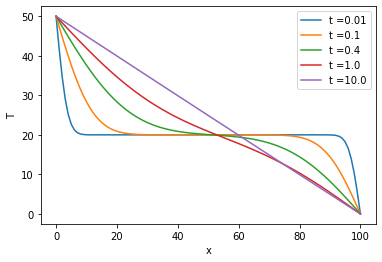

In [ ]:
import numpy as np
from pylab import plot,xlabel,ylabel,show,legend,figure

#Constantes
L=20.0
D=0.1
N=100
a=L/N
h=0.01

A=10.0
B=12.0
tau=365
Tfixed=11

tmax=10.01*365
steps=int(tmax/h)

s1=int(9.25*365/h)
s2=int(9.50*365/h)
s3=int(9.75*365/h)
s4=int(10.0*365/h)

T=empty(N+1,float)
T[0:N]=A
T[N]=

tt=linspace(8.0,10.,100)
T_list=[(a+B*sin(2*pi*myt)) for myt in tt]